# Project Name - Electric Vehicle Population

# Problem Statement

To analyze the adoption, geographic distribution, and performance characteristics of electric vehicles (EVs) across different regions.

# Objective

1. Understand regional EV adoption patterns by analyzing the distribution of electric vehicles across counties, cities, and states, and identifying areas with the highest and lowest adoption rates.
2. Analyze vehicle performance characteristics, such as electric range, and how these vary by vehicle type (Battery Electric vs. Plug-in Hybrid) and model year.
3. Evaluate the impact of government policies by correlating EV adoption with legislative districts and Clean Alternative Fuel Vehicle (CAFV) eligibility.
4. Identify popular vehicle makes and models, and assess how economic factors like the base MSRP and government incentives (CAFV Eligibility) influence consumer decisions.


# Import neccessary packages


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading the file from the Local System to the Notebook


In [26]:
#importing pandas library
import pandas as pd
# Reading csv file from the system
# Use read_csv to read the data from the CSV file into a DataFrame
data_df = pd.read_csv(r'C:\Users\Mehshar\Desktop\Sprint 1\Electric_Vehicle_Population_Data.csv')

data_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31.0,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10


**Insight**  
Loading the file from local system to jupyter notebbok


# _Dataset view_


In [2]:
# Display the first 5 rows of the DataFrame
data_df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [3]:
# Display the last 5 rows of the dataframe
data_df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31.0,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
191406,7SAYGAEEXP,Benton,Richland,WA,99352.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,233761440,POINT (-119.2958528 46.2421419),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10


# UNDERSTANDING THE VARIABLE


**1. VIN (1-10):**
Vehicle Identification Number (VIN): A unique code assigned to each vehicle for identification. In this case, it represents the first 10 characters of the full VIN. It helps track a specific vehicle's make, model, year, and origin.  
**2. County:**
The administrative region (within a state) where the electric vehicle is registered or located. It helps in analyzing the geographic distribution of EVs at the county level.  
**3. City:**
The city where the vehicle is registered or in use. It allows for detailed geographic analysis and helps determine urban versus rural EV adoption trends.  
**4. State:**  
The state in which the vehicle is registered. This helps in regional analysis of EV adoption across different states in the country.  
**5. Postal Code:**
The ZIP code where the vehicle is registered. It provides even more granular geographic detail, enabling neighborhood-level insights.  
**6. Model Year:**
The year in which the vehicle was manufactured. This column helps in tracking how the electric vehicle market has evolved over time and allows for analyzing trends in vehicle adoption by age.  
**7. Make:**
**The brand or manufacturer of the vehicle (e.g., Tesla, Nissan, Chevrolet). This column is important for analyzing the market share of different manufacturers.  
**8. Model:\*\*
**The specific model of the vehicle (e.g., Tesla Model 3, Nissan Leaf). It helps in understanding which models are more popular and comparing their performance or market adoption.  
**9. Electric Vehicle Type:**
The type of electric vehicle, such as:
Battery Electric Vehicle (BEV): Fully electric, with no internal combustion engine.
Plug-in Hybrid Electric Vehicle (PHEV): Hybrid vehicle with an internal combustion engine and a battery that can be charged. This column allows you to differentiate between different categories of electric vehicles.  
**10. Clean Alternative Fuel Vehicle (CAFV) Eligibility:**
Indicates whether the vehicle is eligible for government incentives or policies designed to promote cleaner transportation (e.g., tax rebates, subsidies). This field helps assess how policy incentives affect vehicle adoption.  
**11. Electric Range:**
The maximum distance the vehicle can travel on a full charge (in miles or kilometers). It helps in evaluating the performance of different EV models and correlating it with consumer preferences.  
**12. Base MSRP:**
Manufacturer’s Suggested Retail Price: The price at which the vehicle is sold before any discounts, rebates, or incentives. It provides insight into the economic factors influencing EV adoption and affordability.  
**13. Legislative District:**
The political district where the vehicle is registered. This is useful for analyzing the impact of regional policies and political decisions on EV adoption rates.  
**14. DOL Vehicle ID:**
The unique identifier assigned to the vehicle by the Department of Licensing. This is another unique identifier that may be useful for tracking vehicles or performing vehicle-level analysis.  
**15. Vehicle Location:**
The geographic coordinates or location of the vehicle. This column helps in spatial analysis, such as proximity to charging stations or utility service areas.  
**16. Electric Utility:**
The utility company that provides electricity to the vehicle's location. This is relevant for analyzing how different utility companies support EV charging infrastructure and services.  
**17. 2020 Census Tract:\*\*
A small, relatively permanent statistical subdivision of a county used by the U.S. Census Bureau. It helps in understanding the demographic characteristics (income, population density, etc.) of areas where EVs are adopted.


# Dataset Information


In [4]:
#Dataset information and no of columns along with the data types of their values
data_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

**Insight**  
we use info() to get the summary of our dataset i.e column, non null, count, memory, usage and datset


# _Missing values/Null values_


# _Dublicate values_


In [5]:
#The describe() function in the Pandas library provides a quick overview of the statistical properties of a DataFrame or Series.
data_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,191403.000000,191407.000000,191407.000000,191407.000000,190993.000000,1.914070e+05,1.914030e+05
mean,98177.823603,2020.732335,55.657442,994.773258,29.016880,2.237202e+08,5.297759e+10
std,2392.808886,2.990487,90.151930,8050.523372,14.909417,7.398058e+07,1.573588e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.861622e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.328176e+08,5.303303e+10
75%,98371.000000,2023.000000,72.000000,0.000000,42.000000,2.589708e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [6]:
# The value_counts() function in Pandas is used to count the occurrences of unique values in a Pandas Series or DataFrame column.
data_df['County'].value_counts(ascending=True)


County
Richland            1
Goochland           1
Lee                 1
Newport News        1
Hennepin            1
                ...  
Thurston         6969
Clark           11335
Pierce          14932
Snohomish       22643
King            99076
Name: count, Length: 197, dtype: int64

In [7]:
#To determine count of NaN values in the column
data_df.isnull().sum()



VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [8]:
'''The dropna() function in Pandas is used to remove missing or NaN (Not-a-Number)
values from a DataFrame or Series. It allows you to clean our data by eliminating rows
or columns that contain missing values.'''
data_df.dropna(inplace=True)
print("after removing NaN values:")
data_df.info()

after removing NaN values:
<class 'pandas.core.frame.DataFrame'>
Index: 190989 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         190989 non-null  object 
 1   County                                             190989 non-null  object 
 2   City                                               190989 non-null  object 
 3   State                                              190989 non-null  object 
 4   Postal Code                                        190989 non-null  float64
 5   Model Year                                         190989 non-null  int64  
 6   Make                                               190989 non-null  object 
 7   Model                                              190989 non-null  object 
 8   Electric Vehicle Type                              1

In [9]:
#The duplicated() function in Pandas is used to identify and mark duplicated rows in a DataFrame or Series.
data_df.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
191402    False
191403    False
191404    False
191405    False
191406    False
Length: 190989, dtype: bool

In [10]:
# To find no.of duplicate rows in the dataframe
duplicate_rows = data_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())


Number of duplicate rows: 0


In [11]:
#Before removing checking no of row and col
print("After removing NaN values")
print(data_df.shape)

After removing NaN values
(190989, 17)


In [12]:
# Now the data is cleaned so we can save our cleaned dataset to Data_Cleaned.csv file
data_df.to_csv('Data_Cleaned.csv', index=False)

In [13]:
data_df.describe(include="O").T

,count,unique,top,freq
VIN (1-10),190989,11480,7SAYGDEE6P,1233
County,190989,39,King,99076
City,190989,477,Seattle,31436
State,190989,1,WA,190989
Make,190989,42,TESLA,84464
Model,190989,147,MODEL Y,39443
Electric Vehicle Type,190989,2,Battery Electric Vehicle (BEV),149395
Clean Alternative Fuel Vehicle (CAFV) Eligibility,190989,3,Eligibility unknown as battery range has not b...,101953
Vehicle Location,190989,552,POINT (-122.1207376 47.6705374),4858
Electric Utility,190989,74,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),70546


**Insight**
In previous describe() we got only numeric values so get string value we used describe(include = 'O').T  
In output we can see non-numeric values.


# Data Visualisation


# Chart 1

# Electric Vehicle Type vs CAFV Eligibility Table


In [14]:
pd.crosstab(data_df['Electric Vehicle Type'], data_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])


Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
Electric Vehicle Type,,,
Battery Electric Vehicle (BEV),47434,101953,8
Plug-in Hybrid Electric Vehicle (PHEV),21175,0,20419


A table that compares the number of vehicles of different Electric Vehicle Types and their CAFV Eligibility status.


# Summary Statistics Table


In [33]:
data_df[['Electric Range', 'Base MSRP', 'Model Year']].describe()


,Electric Range,Base MSRP,Model Year
count,191407.000000,191407.000000,191407.000000
mean,55.657442,994.773258,2020.732335
std,90.151930,8050.523372,2.990487
min,0.000000,0.000000,1997.000000
25%,0.000000,0.000000,2019.000000
50%,0.000000,0.000000,2022.000000
75%,72.000000,0.000000,2023.000000
max,337.000000,845000.000000,2025.000000


# State-wise Vehicle Distribution Table


In [36]:
data_df.groupby('State').agg({'VIN (1-10)': 'count', 'Electric Range': 'mean', 'Base MSRP': 'mean'}).rename(columns={'VIN (1-10)': 'Number of Vehicles'})


,Number of Vehicles,Electric Range,Base MSRP
State,,,
AE,1,249.000000,0.000000
AK,1,0.000000,0.000000
AL,7,74.000000,0.000000
AR,2,236.000000,0.000000
AZ,13,53.153846,0.000000
BC,3,157.666667,0.000000
CA,107,46.336449,0.000000
CO,16,48.000000,0.000000
CT,7,69.428571,0.000000


# chart 2


<Axes: title={'center': 'Electric Vehicle Types Distribution'}, xlabel='Electric Vehicle Type'>

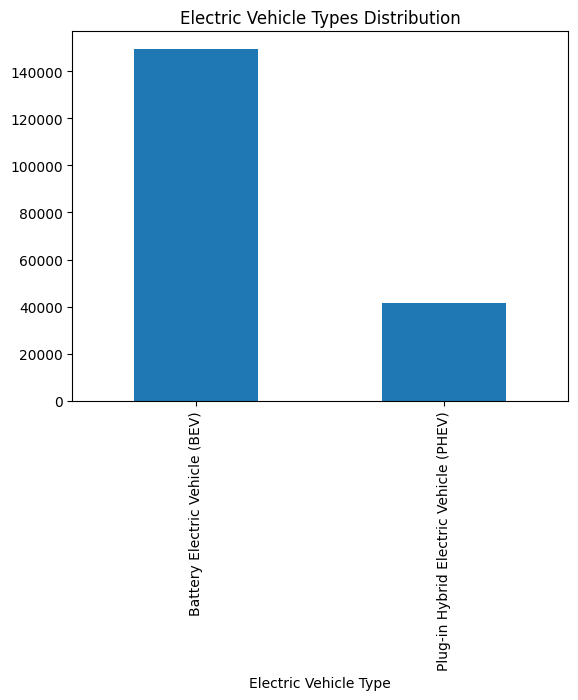

In [15]:
data_df['Electric Vehicle Type'].value_counts().plot(kind='bar', title='Electric Vehicle Types Distribution')


**Insight**  
Distribution of Electric Vehicle Types: Compare the count of different types of electric vehicles (BEV, PHEV) using a bar chart.


# Chart 3


In [35]:
data_df.groupby(['Make', 'Model']).agg({'VIN (1-10)': 'count', 'Electric Range': 'mean', 'Base MSRP': 'mean'}).rename(columns={'VIN (1-10)': 'Number of Vehicles'})


Number of Vehicles  Electric Range     Base MSRP
Make                 Model                                                   
ACURA                ZDX                      1        0.000000      0.000000
ALFA ROMEO           TONALE                  56       33.000000      0.000000
AUDI                 A3                     560       16.000000      0.000000
                     A7 E                    13       24.000000      0.000000
                     A8 E                     3       17.000000      0.000000
...                                         ...             ...           ...
VOLVO                V60                     63       37.984127      0.000000
                     XC40                  1048        0.000000      0.000000
                     XC60                  1187       26.046335   9670.850885
                     XC90                  1552       23.476804   3557.184278
WHEEGO ELECTRIC CARS WHEEGO                   3      100.000000  32995.000000

[147 rows x 3 columns]

<Axes: title={'center': 'Electric Vehicle Manufacturer Market Share'}, ylabel='count'>

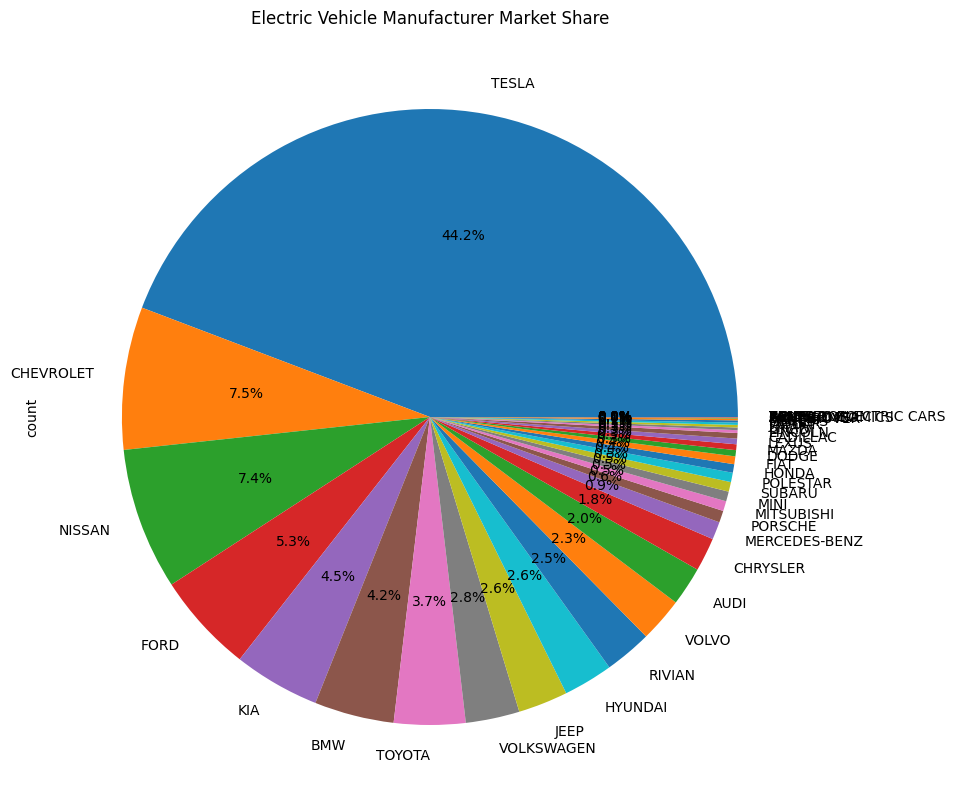

In [16]:
import matplotlib.pyplot as plt

# Data for the pie chart
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the width and height as needed
data_df['Make'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Electric Vehicle Manufacturer Market Share', ax=ax)

**Insight**  
Make/Manufacturer Market Share: Display the proportion of different vehicle manufacturers in the dataset.


In [28]:
data_df['Model Year'].value_counts().sort_index().to_frame('Number of Vehicles')


,Number of Vehicles
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,21
2010,24
2011,736


# Chart 4


<Axes: title={'center': 'Electric Vehicle Adoption Over the Years'}, xlabel='Model Year'>

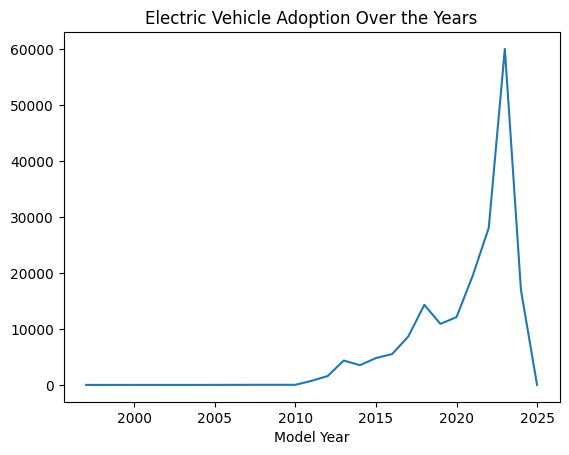

In [17]:
data_df.groupby('Model Year').size().plot(kind='line', title='Electric Vehicle Adoption Over the Years')


**Insight**  
Trend in Model Year: Show the trend of electric vehicle adoption over time by plotting the number of vehicles per model year.


# Chart 5


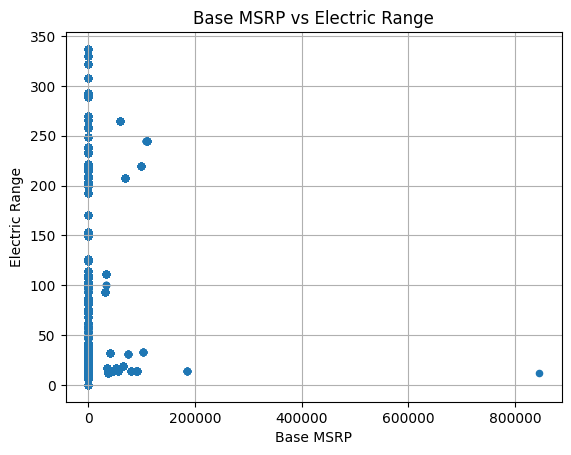

In [18]:
import matplotlib.pyplot as plt

# Create the scatter plot
ax = data_df.plot.scatter(x='Base MSRP', y='Electric Range', title='Base MSRP vs Electric Range')

# Add a grid to the plot
ax.grid(True)

# Display the plot
plt.show()

**Insight**  
Price vs. Electric Range: Analyze the relationship between the vehicle's electric range and its price (Base MSRP). Use a scatter plot to identify trends.


# Chart 6


<Axes: >

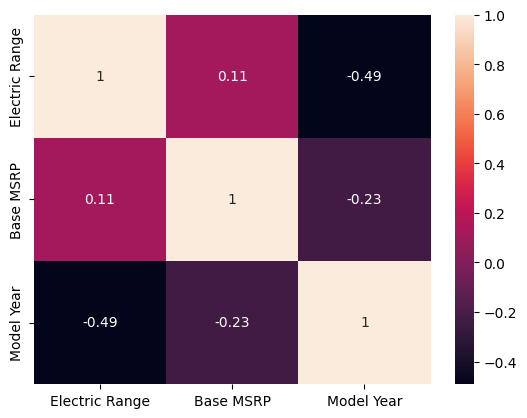

In [19]:
import seaborn as sns
sns.heatmap(data_df[['Electric Range', 'Base MSRP', 'Model Year']].corr(), annot=True)


# Chart 7


<Axes: xlabel='Electric Vehicle Type', ylabel='Base MSRP'>

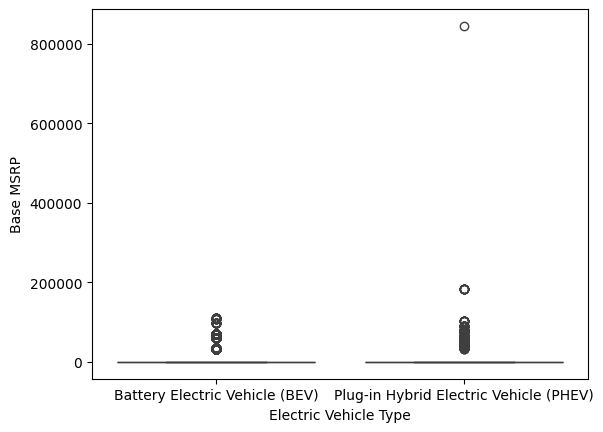

In [20]:
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=data_df)


**Insight**  
Price Distribution by Electric Vehicle Type: Use a box plot to compare the price distribution of different electric vehicle types.


# Chart 8


<Axes: title={'center': 'Electric Vehicle Range Distribution'}, ylabel='Frequency'>

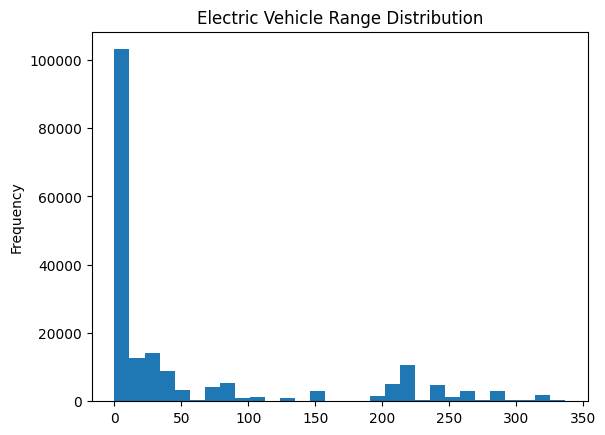

In [21]:
data_df['Electric Range'].plot(kind='hist', bins=30, title='Electric Vehicle Range Distribution')


**Insight**  
Electric Range Distribution: Plot a histogram of the electric range of vehicles to see the most common ranges.


# Chart 9

Model Year by Electric Vehicle Type: Compare how the Electric Vehicle Type has evolved over time using a grouped bar chart with Model Year on the x-axis and vehicle type as different bars within each group.
Comparison: This helps in comparing the evolution of different electric vehicle types (BEV vs. PHEV) across different years.


<Axes: title={'center': 'Electric Vehicle Type by Model Year'}, xlabel='Model Year'>

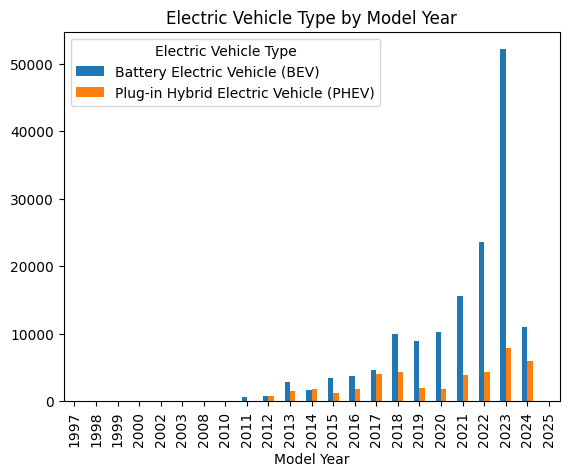

In [22]:
pd.crosstab(data_df['Model Year'], data_df['Electric Vehicle Type']).plot(kind='bar', title='Electric Vehicle Type by Model Year', stacked=False)


**Insight**  
Taller bars in recent years suggest increased adoption of electric vehicles.  
You can compare which type of electric vehicle (BEV, PHEV) has seen the most growth over the years.


# chart 10

Electric Range Distribution by Vehicle Type: Violin plots give a detailed view of the distribution of electric range across different electric vehicle types.  
Comparison: This provides more detailed information than a box plot by showing the density distribution of range values, allowing for a richer comparison of range across EV types.


<Axes: xlabel='Electric Vehicle Type', ylabel='Electric Range'>

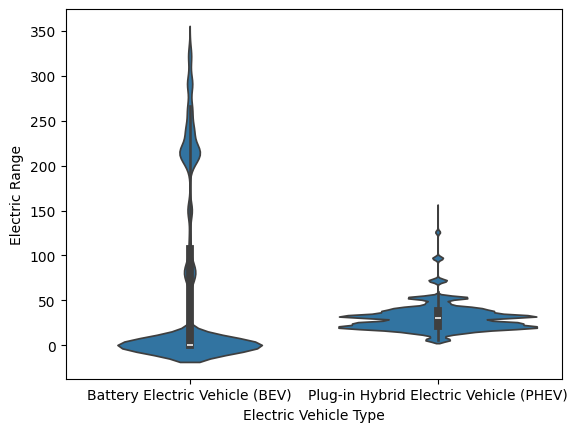

In [23]:
sns.violinplot(x='Electric Vehicle Type', y='Electric Range', data=data_df)


**Insight**  
The width of the plot at a given range value indicates how many vehicles have that range. Wider sections represent more vehicles.
It gives a good comparison of the distribution of electric range between BEVs and PHEVs.


In [27]:
data_df.groupby('Legislative District').agg({'VIN (1-10)': 'count', 'Electric Range': 'mean', 'Base MSRP': 'mean'}).rename(columns={'VIN (1-10)': 'Number of Vehicles'})


,Number of Vehicles,Electric Range,Base MSRP
Legislative District,,,
1.0,8329,52.355865,799.181775
2.0,2215,54.688036,1056.153499
3.0,927,52.776699,709.757282
4.0,1658,49.629674,1238.600724
5.0,8182,52.893791,969.270961
6.0,1838,55.023395,971.675734
7.0,914,60.974836,472.642232
8.0,1994,62.467904,881.085757
9.0,1087,55.229991,709.098436
